Warning message:
"package 'data.table' was built under R version 3.5.3"

SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
100002,1,Cash loans,M,N,Y,0,202500.00,406597.5,24700.5,...,0,0,0,0,0,0,0,0,1,child.0
100003,0,Cash loans,F,N,N,0,270000.00,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,child.0
100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,child.0
100006,0,Cash loans,F,N,Y,0,135000.00,312682.5,29686.5,...,0,0,0,NA,NA,NA,NA,NA,NA,child.0
100007,0,Cash loans,M,N,Y,0,121500.00,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,child.0
100008,0,Cash loans,M,N,Y,0,99000.00,490495.5,27517.5,...,0,0,0,0,0,0,0,1,1,child.0
100010,0,Cash loans,M,Y,Y,0,360000.00,1530000.0,42075.0,...,0,0,0,0,0,0,0,0,0,child.0
100011,0,Cash loans,F,N,Y,0,112500.00,1019610.0,33826.5,...,0,0,0,0,0,0,0,0,1,child.0
100012,0,Revolving loans,M,N,Y,0,135000.00,405000.0,20250.0,...,0,0,0,NA,NA,NA,NA,NA,NA,child.0
100015,0,Cash loans,F,N,Y,0,38419.15,148365.0,10678.5,...,0,0,0,0,0,0,0,0,2,child.0


ERROR: Error in cbind.fill(income1, income2, income3, income4, income5, income6, : 沒有這個函數 "cbind.fill"


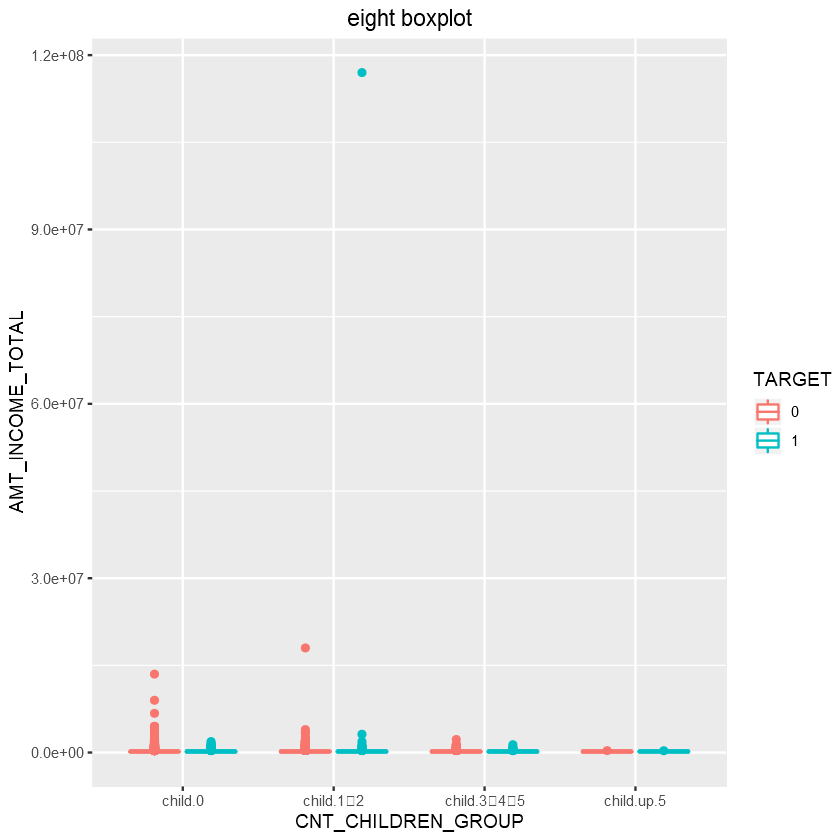

In [1]:
library(data.table)
data=fread('C:\\Users\\coco40725\\Documents\\GitHub\\2nd-ML100Days\\data\\application_train.csv')

## 請將 app_train 中的 CNT_CHILDREN 
## 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
group=data.table(number=(0:max(data$CNT_CHILDREN)),
                 CNT_CHILDREN_GROUP=c('child.0',rep('child.1、2',2),
                                      rep('child.3、4、5',3),
                                      rep('child.up.5',max(data$CNT_CHILDREN)-1-2-3+1)))

setkey(group,'number')
setkey(data,'CNT_CHILDREN')
data=data[group]
data

## 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，
##並繪製 baxplot
##AMT_INCOME_TOTAL TARGET 存在NA，且為相同位置
## 去掉有NA的那筆觀測
data=data[-which(is.na(data$TARGET)==T),]
data[,mean:=mean(AMT_INCOME_TOTAL,na.rm=T),by=c('CNT_CHILDREN_GROUP','TARGET')]
data1=data[,AMT_INCOME_TOTAL,by=c('CNT_CHILDREN_GROUP','TARGET')]
data1[,TARGET:=as.factor(TARGET),]


library(ggplot2)
plot=ggplot(data=data1,aes(x=CNT_CHILDREN_GROUP,y=AMT_INCOME_TOTAL,color=TARGET))+geom_boxplot()+
  ggtitle('eight boxplot')+theme(plot.title = element_text(hjust = 0.5))
plot

##3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，
## 對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
z.data.income=cbind.fill(income1,income2,income3,income4,income5,income6,income7,income8,fill=NA)
z.data.income=apply(z.data.income, 2, scale)
z.data.income